<a href="https://colab.research.google.com/github/Luiskar1/Luiskar1/blob/main/ModeloSupervisadoNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Cargar todas las librerías
import pandas as pd 
import numpy as np 
import scipy as scp
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Cargar el DataFrame
df=pd.read_csv("/content/drive/MyDrive/Analiticas_Aprendizaje/Datos/Nivel_Adap_Estud_PlatOnLine.csv")

In [3]:
#Observar la tabla
df.head()

,GEN,EDAD,NIVELEDU,TIPOINST,USATIC,HABCIUD,VELDES,CLASOCIAL,INTERNET,RED,DURCLAS,LMS,DISP,NIVADAP
0,1,4,2,0,0,1,0,1,1,2,2,0,0,1
1,0,4,2,0,0,1,1,1,0,2,1,1,1,1
2,0,3,1,1,0,1,0,1,1,2,1,0,1,1
3,0,2,0,0,0,1,0,1,0,2,1,0,1,1
4,0,3,0,0,0,1,0,0,0,1,0,0,1,0


In [4]:
# Conocer el tipo de variable
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GEN        1205 non-null   int64
 1   EDAD       1205 non-null   int64
 2   NIVELEDU   1205 non-null   int64
 3   TIPOINST   1205 non-null   int64
 4   USATIC     1205 non-null   int64
 5   HABCIUD    1205 non-null   int64
 6   VELDES     1205 non-null   int64
 7   CLASOCIAL  1205 non-null   int64
 8   INTERNET   1205 non-null   int64
 9   RED        1205 non-null   int64
 10  DURCLAS    1205 non-null   int64
 11  LMS        1205 non-null   int64
 12  DISP       1205 non-null   int64
 13  NIVADAP    1205 non-null   int64
dtypes: int64(14)
memory usage: 131.9 KB
None


In [5]:
#Definir las variables por columnas
col=df.columns

In [6]:
#Conocer los valores nulos 
for i in col:
    print(i,"-",df[i].isna().sum())

GEN - 0
EDAD - 0
NIVELEDU - 0
TIPOINST - 0
USATIC - 0
HABCIUD - 0
VELDES - 0
CLASOCIAL - 0
INTERNET - 0
RED - 0
DURCLAS - 0
LMS - 0
DISP - 0
NIVADAP - 0


In [7]:
#Cambiar los atributos de las variables en cadena
df[["GEN","EDAD","NIVELEDU","TIPOINST","USATIC","HABCIUD",
    "VELDES","CLASOCIAL", "INTERNET","RED",
    "DURCLAS","LMS", "DISP", "NIVADAP"]]=df[["GEN","EDAD","NIVELEDU","TIPOINST","USATIC","HABCIUD",
    "VELDES","CLASOCIAL", "INTERNET","RED",
    "DURCLAS","LMS", "DISP", "NIVADAP"]].astype("category")


In [8]:
#Imprimir el nuevo DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   GEN        1205 non-null   category
 1   EDAD       1205 non-null   category
 2   NIVELEDU   1205 non-null   category
 3   TIPOINST   1205 non-null   category
 4   USATIC     1205 non-null   category
 5   HABCIUD    1205 non-null   category
 6   VELDES     1205 non-null   category
 7   CLASOCIAL  1205 non-null   category
 8   INTERNET   1205 non-null   category
 9   RED        1205 non-null   category
 10  DURCLAS    1205 non-null   category
 11  LMS        1205 non-null   category
 12  DISP       1205 non-null   category
 13  NIVADAP    1205 non-null   category
dtypes: category(14)
memory usage: 18.4 KB
None


In [9]:
def TablaX(df,VariablesNumericas,VariablesCategoricas):
  datos=df

  if VariablesCategoricas != [] :
    datos_dummies=pd.get_dummies(datos[VariablesCategoricas],drop_first=True)
    X=pd.concat([datos_dummies,datos[VariablesNumericas]],axis=1,sort=False)
  else:
    X=datos[VariablesNumericas].apply
  return X

In [10]:
VariablesCategoricas=df.drop(["NIVADAP"],axis=1).select_dtypes(include=["category"]).columns.to_list()
VariablesCategoricas

['GEN',
 'EDAD',
 'NIVELEDU',
 'TIPOINST',
 'USATIC',
 'HABCIUD',
 'VELDES',
 'CLASOCIAL',
 'INTERNET',
 'RED',
 'DURCLAS',
 'LMS',
 'DISP']

In [11]:
VariablesNumericas=df._get_numeric_data().columns.to_list()
print(VariablesNumericas)

[]


In [12]:
Y=df.NIVADAP

In [13]:
X=TablaX(df,VariablesNumericas,VariablesCategoricas)

In [14]:
X

,GEN_1,EDAD_1,EDAD_2,EDAD_3,EDAD_4,EDAD_5,NIVELEDU_1,NIVELEDU_2,TIPOINST_1,USATIC_1,...,CLASOCIAL_1,CLASOCIAL_2,INTERNET_1,RED_1,RED_2,DURCLAS_1,DURCLAS_2,LMS_1,DISP_1,DISP_2
0,1,0,0,0,1,0,0,1,0,0,...,1,0,1,0,1,0,1,0,0,0
1,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,1,1,0,1,1,0
2,0,0,0,1,0,0,1,0,1,0,...,1,0,1,0,1,1,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,0,0,0,1,0,0,1,0,0,0,...,1,0,1,0,1,1,0,0,1,0
1201,0,0,0,1,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1202,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
1203,0,0,0,1,0,0,1,0,0,0,...,1,0,1,0,1,1,0,0,1,0


In [15]:
#División del cojunto de datos
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(843, 22)
(362, 22)
(843,)
(362,)


In [16]:
#Llamar el modelo de regresión logística multinomial
model1 = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(X_train, y_train)
preds = model1.predict(X_test)

In [17]:
#Correr el modelo y determianr los parámetros
params = model1.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [18]:
# Modelo
from sklearn.tree import DecisionTreeClassifier
# Graficos
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn import tree
# Para optimizar Modelos, Fase validacion
from sklearn.model_selection import GridSearchCV
# evaluar modelos

In [19]:
Modelo_AD= DecisionTreeClassifier(criterion="gini",random_state=123)
Modelo_AD.fit(X_train,y_train)

DecisionTreeClassifier(random_state=123)

In [20]:
X_train.columns

Index(['GEN_1', 'EDAD_1', 'EDAD_2', 'EDAD_3', 'EDAD_4', 'EDAD_5', 'NIVELEDU_1',
       'NIVELEDU_2', 'TIPOINST_1', 'USATIC_1', 'HABCIUD_1', 'VELDES_1',
       'CLASOCIAL_1', 'CLASOCIAL_2', 'INTERNET_1', 'RED_1', 'RED_2',
       'DURCLAS_1', 'DURCLAS_2', 'LMS_1', 'DISP_1', 'DISP_2'],
      dtype='object')

In [21]:
reglas= tree.export_text(Modelo_AD)
print(reglas)

|--- feature_8 <= 0.50
|   |--- feature_13 <= 0.50
|   |   |--- feature_12 <= 0.50
|   |   |   |--- feature_21 <= 0.50
|   |   |   |   |--- feature_16 <= 0.50
|   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |--- feature_19 <= 0.50
|   |   |   |   |   |   |   |--- feature_17 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_17 >  0.50
|   |   |   |   |   |   |   |   |--- feature_14 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_14 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_19 >  0.50
|   |   |   |   |   |   |   |--- feature_20 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_20 >  0.50
|   |   |   | 

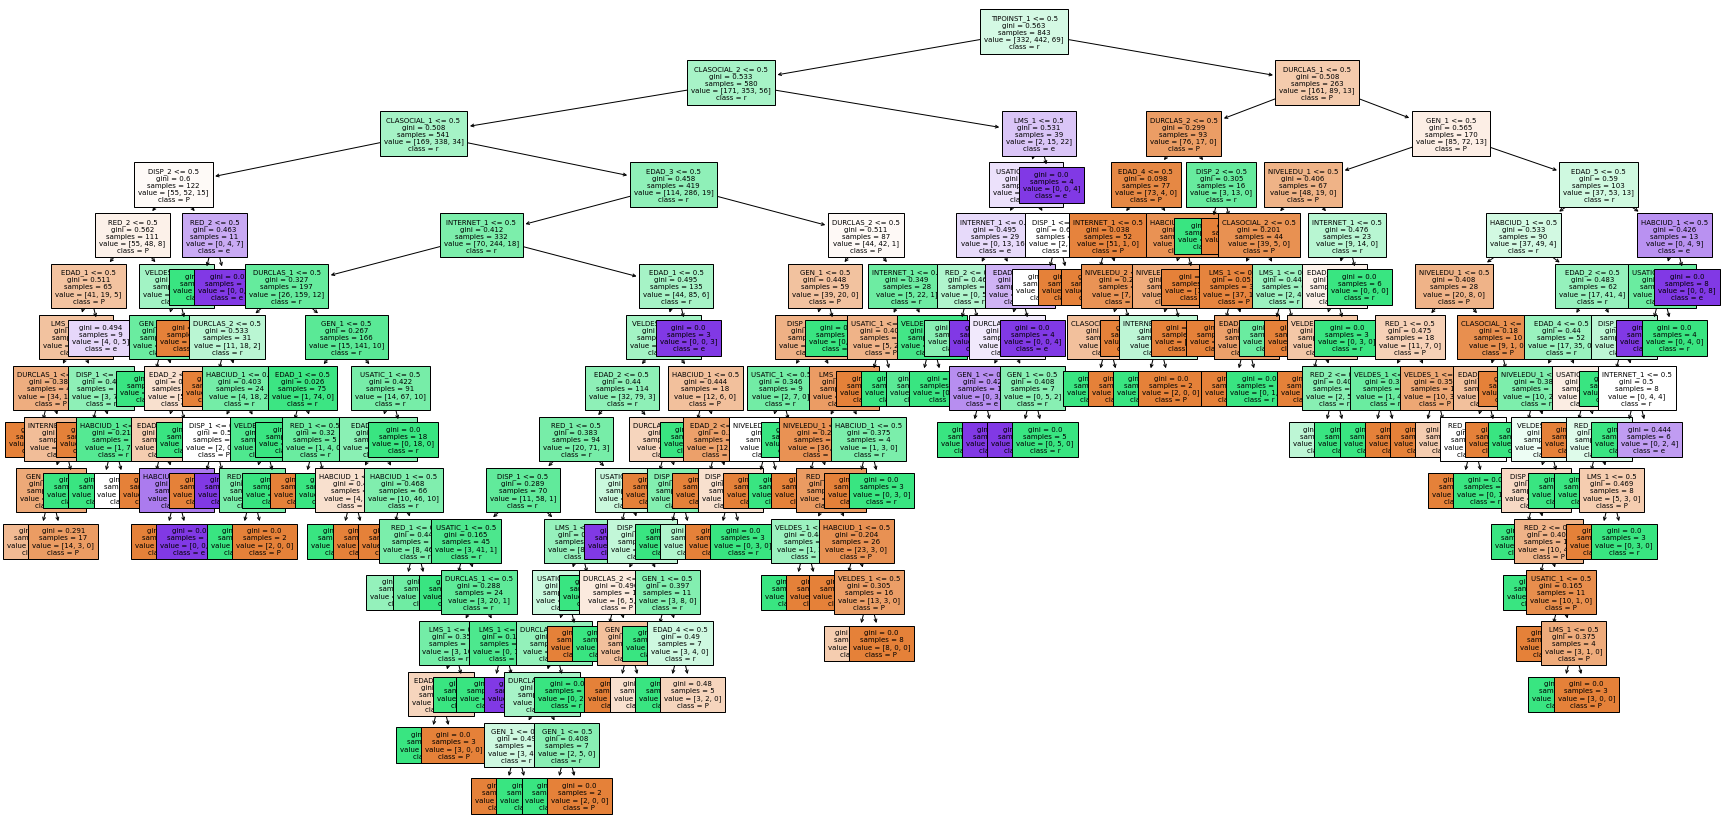

In [22]:
fig, ax = plt.subplots(figsize=(30, 15))
plot=plot_tree(decision_tree=Modelo_AD,
              feature_names=X_train.columns,
                filled        = True,
               fontsize      = 7,
              class_names="Prediccion de Default Credito",
                ax            = ax
              )

In [23]:
Importancia_Predictores=pd.DataFrame(
{"predictor":X_train.columns,
 "Importancia":Modelo_AD.feature_importances_})

Importancia_Predictores=Importancia_Predictores.sort_values("Importancia",ascending=False)
Importancia_Predictores=Importancia_Predictores.reset_index(drop=True)
Importancia_Predictores




,predictor,Importancia
0,GEN_1,0.094993
1,DURCLAS_2,0.080625
2,TIPOINST_1,0.079446
3,HABCIUD_1,0.071537
4,VELDES_1,0.064315
5,DURCLAS_1,0.055890
6,DISP_1,0.054722
7,INTERNET_1,0.054394
8,LMS_1,0.049598
9,CLASOCIAL_2,0.048164


In [24]:
Predicciones_Train_AD=Modelo_AD.predict(X=X_train)
Accuracy_Train_AD=metrics.accuracy_score(y_train,Predicciones_Train_AD)
print(Accuracy_Train_AD)

0.9347568208778173


In [25]:
Reporte_Train_AD=metrics.classification_report(y_train,Predicciones_Train_AD)
print(Reporte_Train_AD)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       332
           1       0.94      0.95      0.94       442
           2       0.90      0.78      0.84        69

    accuracy                           0.93       843
   macro avg       0.93      0.89      0.91       843
weighted avg       0.93      0.93      0.93       843



In [26]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


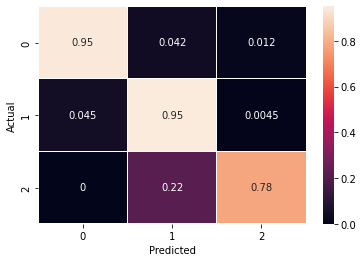

In [27]:
data1 = {"y_Actual":y_train,
        "y_Predicted": Modelo_AD.predict(X_train)
        }
df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix1 = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_Normalizada=confusion_matrix1.astype('float') / confusion_matrix1.sum(axis=1)[:, np.newaxis]
sns.heatmap(confusion_matrix_Normalizada, annot=True,linewidths = 0.01)
plt.show()

In [28]:
Predicciones_Test_AD=Modelo_AD.predict(X=X_test)
Accuracy_Test_AD=metrics.accuracy_score(y_test,Predicciones_Test_AD)
print(Accuracy_Test_AD)

0.9088397790055248


In [29]:
Reporte_Test_AD=metrics.classification_report(y_test,Predicciones_Test_AD)
print(Reporte_Test_AD)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       148
           1       0.90      0.92      0.91       183
           2       0.86      0.77      0.81        31

    accuracy                           0.91       362
   macro avg       0.90      0.87      0.88       362
weighted avg       0.91      0.91      0.91       362



In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn import  metrics

In [31]:
precision, recall, fscore, support = score(y_test,Predicciones_Test_AD)
f1_Score_AD_0=fscore[0]
f1_Score_AD_1=fscore[1]
f1_Score_AD_2=fscore[2]

In [32]:
f=Modelo_AD
f.get_n_leaves()
f.get_depth()

f_alpha = f.cost_complexity_pruning_path(X_train, y_train)
alphas = f_alpha['ccp_alphas']
impurs = f_alpha['impurities']

fs = []
fs = []
for j in alphas:
    f = DecisionTreeClassifier(ccp_alpha=j, random_state=77)
    f.fit(X_train, y_train)
    fs.append(f)
fs
nodes = []
depth = []
for j in range(0, alphas.shape[0]):
    nodes.append(fs[j].tree_.node_count)
    depth.append(fs[j].tree_.max_depth)
train_scores = [f.score(X_train, y_train) for f in fs]
test_scores  = [f.score(X_test, y_test)   for f in fs]

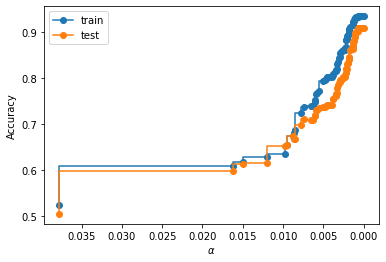

In [33]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel('Accuracy')
#ax.set_title(r'Accuracy vs $\alpha$')
ax.plot(alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(alphas, test_scores,  marker='o', label='test',  drawstyle='steps-post')
ax.invert_xaxis()
ax.legend()
plt.show()

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [35]:
f=DecisionTreeClassifier(random_state=123)
max_depth=range(1,31,3)
min_samples_leaf= range(1,10,1)

param_grid = dict(max_depth = max_depth , min_samples_leaf = min_samples_leaf)
kfold = KFold(n_splits=10, shuffle=False, random_state=None)
grid_search = GridSearchCV(f, param_grid, scoring = 'accuracy', n_jobs = -1, cv = kfold, verbose = 0)
grid_result = grid_search.fit(X_train, y_train)

In [36]:
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

Best: 0.892115 using {'max_depth': 16, 'min_samples_leaf': 1}


In [37]:
Arbol_Optimo=DecisionTreeClassifier(criterion='gini',
                                             max_depth=16, # Profundidad Optima
                                             ccp_alpha=0.001,
                                             random_state=123)
Arbol_Optimo.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=16, random_state=123)

In [38]:
print('Nodos:', Arbol_Optimo.get_n_leaves())

Nodos: 116


Profundidad del árbol: 15
Número de nodos terminales: 116


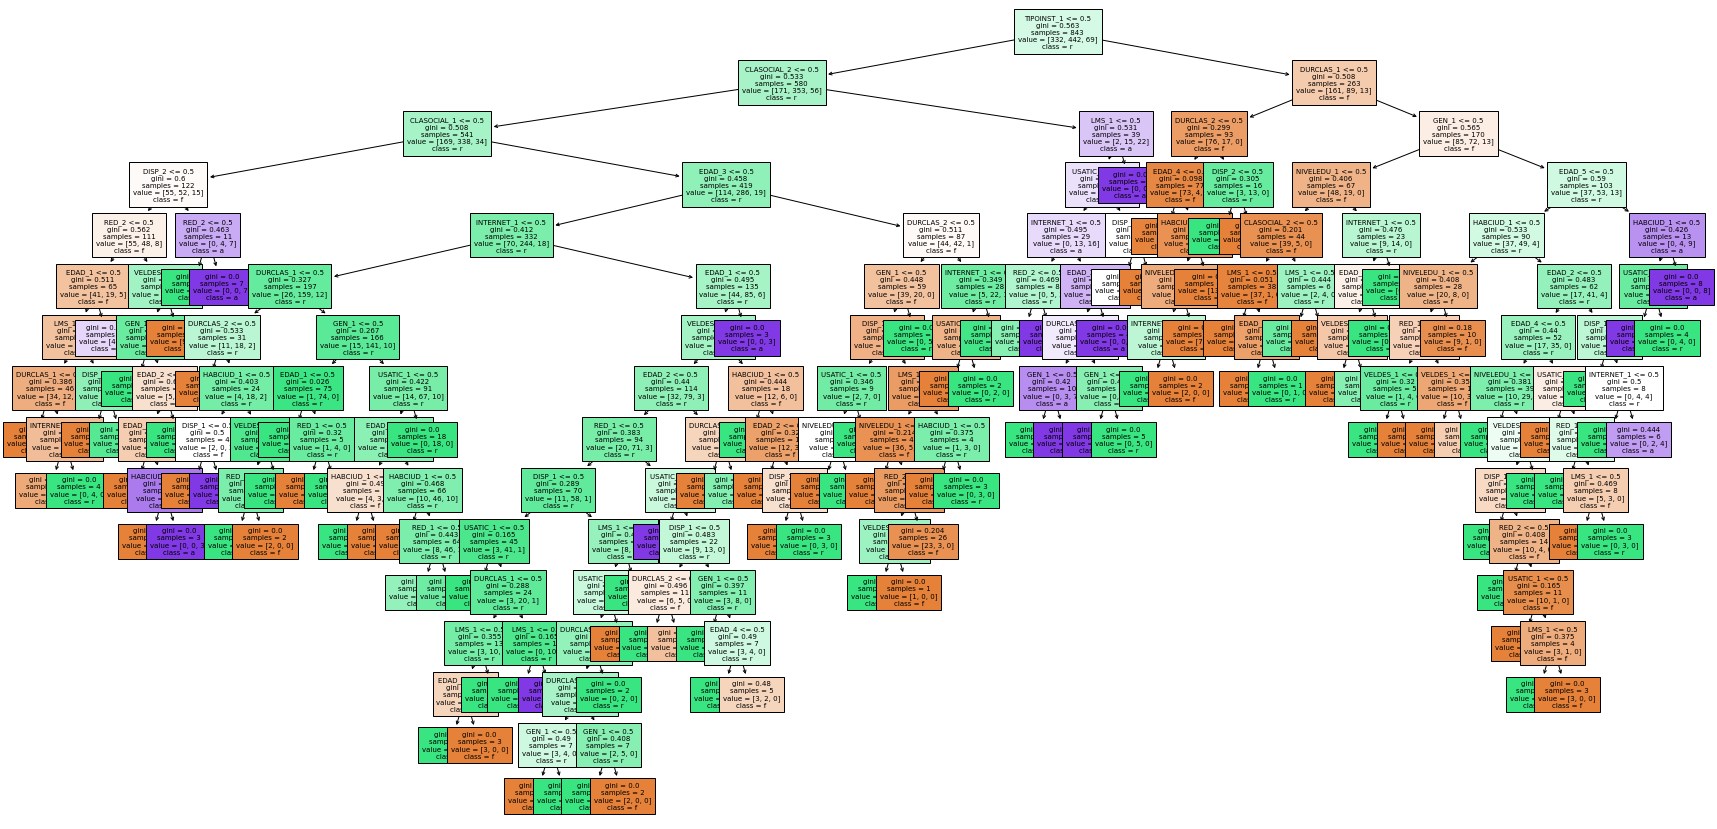

In [39]:
fig, ax = plt.subplots(figsize=(30, 15))
print(f"Profundidad del árbol: {Arbol_Optimo.get_depth()}")
print(f"Número de nodos terminales: {Arbol_Optimo.get_n_leaves()}")
plot=plot_tree(decision_tree=Arbol_Optimo,
              feature_names=X_train.columns,
                filled        = True,
               fontsize      = 7,
              class_names="fraud",
                ax            = ax
              )

In [40]:
Predicciones_Train_AD1=Arbol_Optimo.predict(X=X_train)
Accuracy_Train_AD_Optimo=metrics.accuracy_score(y_train,Predicciones_Train_AD1)
print(Accuracy_Train_AD_Optimo)

0.9323843416370107


In [41]:
Reporte_Trian_AD_Optimo=metrics.classification_report(y_train,Predicciones_Train_AD1)
print(Reporte_Trian_AD_Optimo)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       332
           1       0.93      0.95      0.94       442
           2       0.90      0.78      0.84        69

    accuracy                           0.93       843
   macro avg       0.92      0.89      0.91       843
weighted avg       0.93      0.93      0.93       843



In [42]:
Predicciones_Test_AD_Optimo=Arbol_Optimo.predict(X=X_test)
Accuracy_Test_AD_Optimo=metrics.accuracy_score(y_test,Predicciones_Test_AD_Optimo)
print(Accuracy_Test_AD_Optimo)

0.9005524861878453


In [43]:
Reporte_Test_AD_Optimo=metrics.classification_report(y_test,Predicciones_Test_AD_Optimo)
print(Reporte_Test_AD_Optimo)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       148
           1       0.90      0.91      0.91       183
           2       0.86      0.77      0.81        31

    accuracy                           0.90       362
   macro avg       0.89      0.87      0.88       362
weighted avg       0.90      0.90      0.90       362



In [44]:
precision, recall, fscore, support = score(y_test,Predicciones_Test_AD_Optimo)
f1_Score_AD_Op_0=fscore[0]
f1_Score_AD_Op_1=fscore[1]
f1_Score_AD_Op_2=fscore[2]

In [45]:
df_comparacion_modelos=pd.DataFrame({
    "Modelos":["Arbol Simple","Arbol Opt"],
    "AccuracyTrain":[Accuracy_Train_AD,Accuracy_Train_AD_Optimo],
    "AccuracyTest":[Accuracy_Test_AD,Accuracy_Test_AD_Optimo],
    "F1_Score0":[f1_Score_AD_0,f1_Score_AD_Op_0],
    "F1_Score1":[f1_Score_AD_1,f1_Score_AD_Op_1],
    "F1_Score2":[f1_Score_AD_2,f1_Score_AD_Op_2]
})

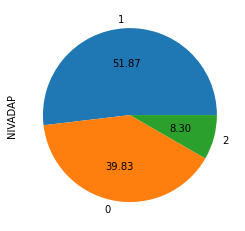

In [46]:
Y.value_counts().plot(kind="pie",autopct="%.2f")

In [47]:
df_comparacion_modelos.sort_values("F1_Score2",ascending=False)

,Modelos,AccuracyTrain,AccuracyTest,F1_Score0,F1_Score1,F1_Score2
0,Arbol Simple,0.934757,0.908840,0.922034,0.913514,0.813559
1,Arbol Opt,0.932384,0.900552,0.912162,0.905149,0.813559


In [50]:
Importancia_Predictores=pd.DataFrame(
{"predictor":X_train.columns,
 "Importancia":Arbol_Optimo.feature_importances_})

Importancia_Predictores=Importancia_Predictores.sort_values("Importancia",ascending=False)
Importancia_Predictores=Importancia_Predictores.reset_index(drop=True)
Importancia_Predictores

,predictor,Importancia
0,GEN_1,0.094746
1,DURCLAS_2,0.082311
2,TIPOINST_1,0.081107
3,HABCIUD_1,0.070020
4,VELDES_1,0.062309
5,DURCLAS_1,0.057058
6,INTERNET_1,0.054993
7,DISP_1,0.054303
8,LMS_1,0.050635
9,CLASOCIAL_2,0.045775


In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [52]:
Probabilidad_test_AD=Arbol_Optimo.predict_proba(X=X_test)
fpr, tpr, thresholds = roc_curve(y_test, Probabilidad_test_AD[:,1])
AUC_AD=round(roc_auc_score(y_test, Probabilidad_test_AD[:,1]),2)
print(AUC_AD)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr,tpr,linestyle="--",color="green",label="Decision Tree, AUC="+str(AUC_AD))
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title("CURVA ROC")
plt.xlabel("Tasa Falsos Positivos")
plt.ylabel("Tasa Verdaderos Positivos")
plt.legend()
plt.show()

ValueError: ignored